In [19]:
import os          
import cv2                                 
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import tensorflow as tf
from sklearn.metrics import *         
import matplotlib.pyplot as plt 
import sklearn.model_selection as model_selection

In [20]:
dataset = '../dataset/eyes'
class_names = []
for folder in os.listdir(dataset):
    class_names.append(folder)
    
class_names_label = {class_name:i for i, class_name in enumerate(class_names)} 

images = []
labels = []  
print("Loading Dataset {}".format(dataset))
for folder in os.listdir(dataset):
    label = class_names_label[folder]
    for file in tqdm(os.listdir(os.path.join(dataset, folder))):
        img_path = os.path.join(os.path.join(dataset, folder), file)
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        IMAGE_SIZE = (150, 150)
        image = cv2.resize(image, IMAGE_SIZE)
        images.append(image)
        labels.append(label)
               
images = np.array(images, dtype = 'float32')
images = images/255.0
labels = np.array(labels, dtype = 'int32')  
    

Loading Dataset ../dataset/eyes


100%|████████████████████████████████████████| 50/50 [00:00<00:00, 1010.39it/s]


In [21]:
train_images, test_images, train_labels, test_labels = model_selection.train_test_split(images, labels, train_size=0.80,test_size=0.20, random_state=101) 

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(30, activation=tf.nn.softmax)
])

In [23]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=15, validation_split = 0.2)

Epoch 1/15
2/2 [==============================] - 3s 1s/step - loss: 1.4168 - accuracy: 0.5000 - val_loss: 1.6856 - val_accuracy: 0.4355
Epoch 2/15
2/2 [==============================] - 2s 1s/step - loss: 1.3046 - accuracy: 0.5123 - val_loss: 1.6566 - val_accuracy: 0.4355
Epoch 3/15
2/2 [==============================] - 2s 1s/step - loss: 1.1176 - accuracy: 0.5287 - val_loss: 1.5169 - val_accuracy: 0.4355
Epoch 4/15
2/2 [==============================] - 2s 1s/step - loss: 0.9993 - accuracy: 0.5451 - val_loss: 1.4978 - val_accuracy: 0.4355
Epoch 5/15
2/2 [==============================] - 2s 1s/step - loss: 0.8810 - accuracy: 0.6967 - val_loss: 1.7243 - val_accuracy: 0.4516
Epoch 6/15
2/2 [==============================] - 2s 1s/step - loss: 0.8272 - accuracy: 0.6434 - val_loss: 1.5444 - val_accuracy: 0.4355
Epoch 7/15
2/2 [==============================] - 2s 1s/step - loss: 0.7091 - accuracy: 0.8156 - val_loss: 1.7540 - val_accuracy: 0.4677
Epoch 8/15
2/2 [=========================

In [32]:
def plot_accuracy_loss(history):
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

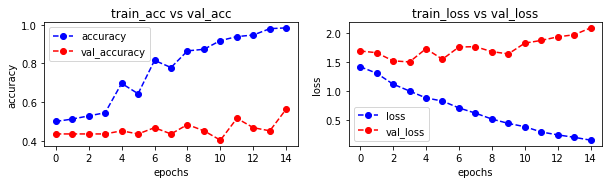

In [33]:
plot_accuracy_loss(history)

In [34]:
test_loss = model.evaluate(test_images, test_labels)

3/3 [==============================] - 0s 61ms/step - loss: 1.5314 - accuracy: 0.5584


In [35]:
predictions = np.argmax(model.predict(test_images), axis = 1)
actual = test_labels

In [36]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(actual,predictions),index = class_names, columns =class_names)

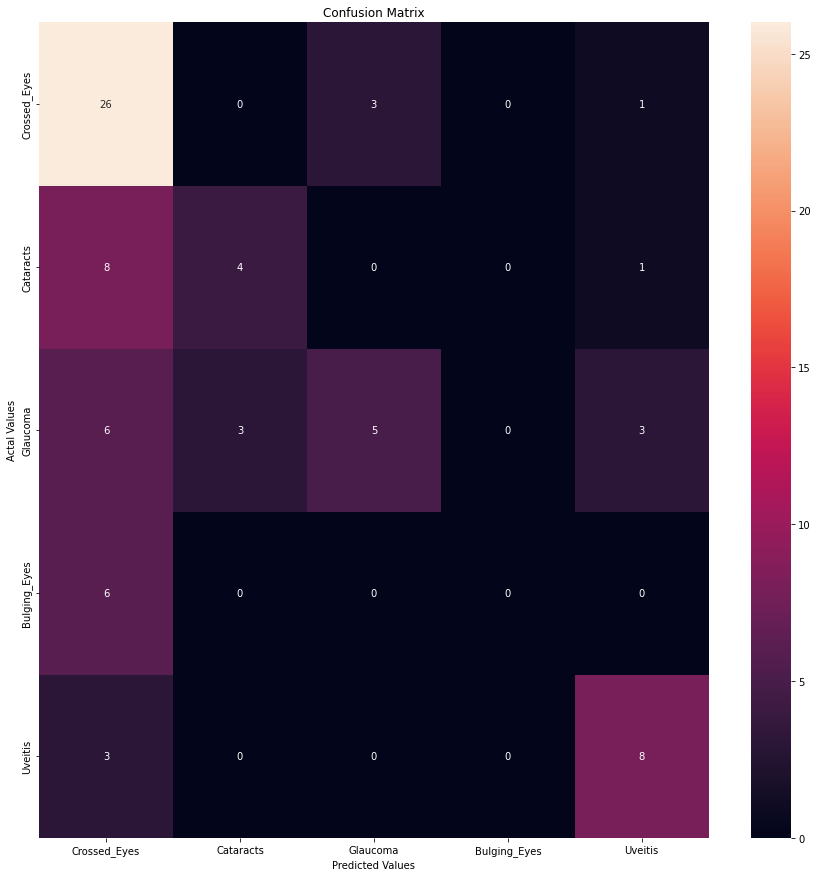

In [37]:
plt.figure(figsize=(15,15))
sns.heatmap(confusion_matrix_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()